In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_groq import ChatGroq

In [3]:
load_dotenv()

True

In [12]:
model=ChatGroq(model='llama-3.1-8b-instant')

In [13]:
class BlogState(TypedDict):
    title :str
    outline :str
    content :str
    


In [14]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [15]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

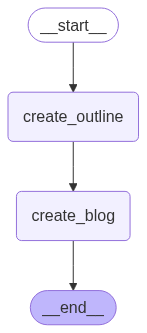

In [21]:
#define graph

graph=StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog',create_blog)


graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')


graph.add_edge('create_blog',END)


graph.compile(())

In [17]:
workflow = graph.compile()

initial_state={'title': "write bolg on Finanace analyst"}

final_state=workflow.invoke(initial_state)

In [19]:
final_state['content']

'**A Comprehensive Guide to Becoming a Financial Analyst: Career Path, Skills, and Salary Expectations**\n\nAs the world of finance continues to evolve at a rapid pace, the role of a financial analyst has become increasingly crucial in business decision-making. In this blog post, we will delve into the world of financial analysis, exploring the job description, education and training requirements, skills and knowledge, career path and progression, salary expectations, and industry trends. Whether you\'re an aspiring financial analyst or simply looking to expand your knowledge, this comprehensive guide will provide you with the insights and information you need to succeed in this exciting and rewarding career.\n\n**I. Introduction**\n\nA financial analyst plays a vital role in helping organizations make informed decisions about investments, funding, and other financial matters. They analyze financial data, identify trends, and provide recommendations to stakeholders, including executive